<a href="https://colab.research.google.com/github/Gilgamesh60/Summer_school_task/blob/main/Summer__school_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()

In [ ]:
train_data=pd.read_csv('train_data.csv')
train_data

,id,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,8990,control,bus,2007,automatik,136,b_klasse,125000,1,benzin,mercedes_benz,nein,55232
1,1,privat,Angebot,49900,test,suv,2011,automatik,400,cayenne,80000,6,benzin,porsche,nein,89155
2,2,privat,Angebot,7500,control,limousine,2005,manuell,0,a6,150000,11,diesel,audi,nein,26125
3,3,privat,Angebot,1350,control,limousine,1997,manuell,170,3er,150000,5,benzin,bmw,nein,37671
4,4,privat,Angebot,650,test,kombi,1998,automatik,170,e_klasse,150000,8,benzin,mercedes_benz,ja,45141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,208759,privat,Angebot,5012,control,bus,2007,manuell,134,andere,150000,10,diesel,peugeot,ja,88456
208760,208760,privat,Angebot,3600,test,kombi,2003,manuell,170,c_klasse,150000,11,benzin,mercedes_benz,nein,61137
208761,208761,privat,Angebot,4450,control,cabrio,2005,manuell,109,2_reihe,125000,11,diesel,peugeot,nein,12057
208762,208762,privat,Angebot,1600,control,limousine,1999,manuell,75,andere,125000,1,benzin,peugeot,nein,75175


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data.groupby('fuel_type').mean().sort_values('price')['price']

fuel_type
andere      3206.045455
lpg         4428.450518
cng         5014.237705
benzin      6804.529785
elektro    10656.591837
diesel     12194.510545
hybrid     14639.355556
Name: price, dtype: float64

In [ ]:
train_data.groupby('vehicle_type').mean().sort_values('price')['price']

vehicle_type
kleinwagen     3115.818550
andere         4412.266480
bus            7565.095011
limousine      8582.421204
kombi          8975.926375
cabrio        11219.141955
suv           13961.611486
coupe         23351.311591
Name: price, dtype: float64

In [ ]:
train_data.groupby('abtest').mean()['price']

abtest
control    8178.074381
test       8919.831937
Name: price, dtype: float64

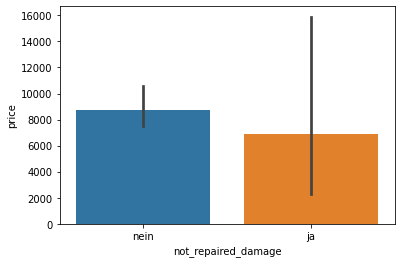

In [ ]:
sns.barplot(x="not_repaired_damage",y="price",data=train_data)

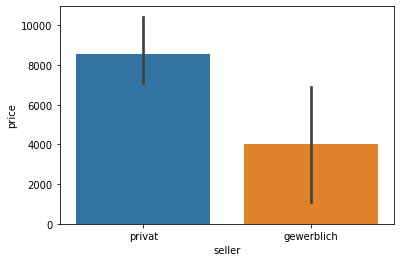

In [ ]:
sns.barplot(x="seller",y="price",data=train_data)

In [ ]:
train_data=train_data.replace({'vehicle_type':{'kleinwagen':0 ,'andere':1,'bus':2,'limousine':3,'kombi':4,'cabrio':5,'suv':6,'coupe':7},'fuel_type':{'andere':0 ,'lpg' :1,'cng':2,'benzin':3,'elektro':4,'diesel':5,'hybrid':6}})

In [ ]:
train_data=train_data.replace({"gearbox": {'automatik':1,'manuell':0},"seller":{"privat":1,"gewerblich":1},"not_repaired_damage":{"nein":1,"ja":0},'abtest':{'control':0,'test' :1}})
train_data

,id,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,1,Angebot,8990,0,2,2007,1,136,b_klasse,125000,1,3,mercedes_benz,1,55232
1,1,1,Angebot,49900,1,6,2011,1,400,cayenne,80000,6,3,porsche,1,89155
2,2,1,Angebot,7500,0,3,2005,0,0,a6,150000,11,5,audi,1,26125
3,3,1,Angebot,1350,0,3,1997,0,170,3er,150000,5,3,bmw,1,37671
4,4,1,Angebot,650,1,4,1998,1,170,e_klasse,150000,8,3,mercedes_benz,0,45141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,208759,1,Angebot,5012,0,2,2007,0,134,andere,150000,10,5,peugeot,0,88456
208760,208760,1,Angebot,3600,1,4,2003,0,170,c_klasse,150000,11,3,mercedes_benz,1,61137
208761,208761,1,Angebot,4450,0,5,2005,0,109,2_reihe,125000,11,5,peugeot,1,12057
208762,208762,1,Angebot,1600,0,3,1999,0,75,andere,125000,1,3,peugeot,1,75175


In [ ]:
#dropping unnecessary columns
train_data=train_data.drop(['offer_type','id','postal_code'],axis=1)

In [ ]:
train_data

,seller,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage
0,1,8990,0,2,2007,1,136,b_klasse,125000,1,3,mercedes_benz,1
1,1,49900,1,6,2011,1,400,cayenne,80000,6,3,porsche,1
2,1,7500,0,3,2005,0,0,a6,150000,11,5,audi,1
3,1,1350,0,3,1997,0,170,3er,150000,5,3,bmw,1
4,1,650,1,4,1998,1,170,e_klasse,150000,8,3,mercedes_benz,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,1,5012,0,2,2007,0,134,andere,150000,10,5,peugeot,0
208760,1,3600,1,4,2003,0,170,c_klasse,150000,11,3,mercedes_benz,1
208761,1,4450,0,5,2005,0,109,2_reihe,125000,11,5,peugeot,1
208762,1,1600,0,3,1999,0,75,andere,125000,1,3,peugeot,1


In [ ]:
train_data.model.value_counts().sort_values(ascending=False).head(15)

golf           16765
andere         16242
3er            12583
polo            7021
corsa           6655
a4              6270
astra           6136
passat          6038
c_klasse        5513
5er             5473
e_klasse        4760
a3              3948
a6              3825
focus           3555
transporter     3256
Name: model, dtype: int64

In [ ]:
train_data.brand.value_counts().sort_values(ascending=False).head(9)

volkswagen       43302
bmw              24342
mercedes_benz    21473
opel             21157
audi             19701
ford             13978
renault           9337
peugeot           6270
fiat              5144
Name: brand, dtype: int64

In [ ]:
top_9=[x for x in train_data.brand.value_counts().sort_values(ascending=False).head(9).index]
top_9

['volkswagen',
 'bmw',
 'mercedes_benz',
 'opel',
 'audi',
 'ford',
 'renault',
 'peugeot',
 'fiat']

In [ ]:
top_10=[x for x in train_data.model.value_counts().sort_values(ascending=False).head(15).index]
top_10

['golf',
 'andere',
 '3er',
 'polo',
 'corsa',
 'a4',
 'astra',
 'passat',
 'c_klasse',
 '5er',
 'e_klasse',
 'a3',
 'a6',
 'focus',
 'transporter']

In [ ]:
def one_hot_encode(df,variable,top_labels):
  for label in top_labels:
    df[variable+'_'+label]=np.where(df[variable]==label,1,0)

one_hot_encode(train_data,'model',top_10)
train_data

,seller,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,...,model_a4,model_astra,model_passat,model_c_klasse,model_5er,model_e_klasse,model_a3,model_a6,model_focus,model_transporter
0,1,8990,0,2,2007,1,136,b_klasse,125000,1,...,0,0,0,0,0,0,0,0,0,0
1,1,49900,1,6,2011,1,400,cayenne,80000,6,...,0,0,0,0,0,0,0,0,0,0
2,1,7500,0,3,2005,0,0,a6,150000,11,...,0,0,0,0,0,0,0,1,0,0
3,1,1350,0,3,1997,0,170,3er,150000,5,...,0,0,0,0,0,0,0,0,0,0
4,1,650,1,4,1998,1,170,e_klasse,150000,8,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,1,5012,0,2,2007,0,134,andere,150000,10,...,0,0,0,0,0,0,0,0,0,0
208760,1,3600,1,4,2003,0,170,c_klasse,150000,11,...,0,0,0,1,0,0,0,0,0,0
208761,1,4450,0,5,2005,0,109,2_reihe,125000,11,...,0,0,0,0,0,0,0,0,0,0
208762,1,1600,0,3,1999,0,75,andere,125000,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_encode(train_data,'brand',top_9)
train_data

,seller,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,...,model_transporter,brand_volkswagen,brand_bmw,brand_mercedes_benz,brand_opel,brand_audi,brand_ford,brand_renault,brand_peugeot,brand_fiat
0,1,8990,0,2,2007,1,136,b_klasse,125000,1,...,0,0,0,1,0,0,0,0,0,0
1,1,49900,1,6,2011,1,400,cayenne,80000,6,...,0,0,0,0,0,0,0,0,0,0
2,1,7500,0,3,2005,0,0,a6,150000,11,...,0,0,0,0,0,1,0,0,0,0
3,1,1350,0,3,1997,0,170,3er,150000,5,...,0,0,1,0,0,0,0,0,0,0
4,1,650,1,4,1998,1,170,e_klasse,150000,8,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,1,5012,0,2,2007,0,134,andere,150000,10,...,0,0,0,0,0,0,0,0,1,0
208760,1,3600,1,4,2003,0,170,c_klasse,150000,11,...,0,0,0,1,0,0,0,0,0,0
208761,1,4450,0,5,2005,0,109,2_reihe,125000,11,...,0,0,0,0,0,0,0,0,1,0
208762,1,1600,0,3,1999,0,75,andere,125000,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train=train_data.drop(['price','model','brand','month_of_registration'],axis=1)
y_train=train_data['price']
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
test_data=pd.read_csv('test_data.csv')
test_data=test_data.replace({'vehicle_type':{'kleinwagen':0 ,'andere':1,'bus':2,'limousine':3,'kombi':4,'cabrio':5,'suv':6,'coupe':7},'fuel_type':{'andere':0 ,'lpg' :1,'cng':2,'benzin':3,'elektro':4,'diesel':5,'hybrid':6}})
test_data=test_data.replace({"gearbox": {'automatik':1,'manuell':0},"seller":{"privat":1,"gewerblich":1},"not_repaired_damage":{"nein":1,"ja":0},'abtest':{'control':0,'test' :1}})
one_hot_encode(test_data,'brand',top_9)
one_hot_encode(test_data,'model',top_10)
test_data=test_data.drop(['offer_type','id','postal_code','brand','model'],axis=1)
test_data

,seller,abtest,vehicle_type,year_of_registration,gearbox,power,kilometer,month_of_registration,fuel_type,not_repaired_damage,...,model_a4,model_astra,model_passat,model_c_klasse,model_5er,model_e_klasse,model_a3,model_a6,model_focus,model_transporter
0,1,0,0,2000,0,75,150000,3,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,1995,1,0,150000,3,3,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1998,0,54,125000,8,3,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,2009,0,163,125000,4,5,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,2007,0,87,150000,5,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52187,1,1,3,2009,0,101,60000,12,3,1,...,0,0,0,0,0,0,0,0,1,0
52188,1,1,3,1991,0,75,150000,9,5,1,...,0,0,0,0,0,1,0,0,0,0
52189,1,1,5,2000,1,54,150000,5,3,1,...,0,0,0,0,0,0,0,0,0,0
52190,1,1,3,2014,1,230,30000,8,3,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
reg=regressor.fit(X_train,y_train)

In [ ]:
reg

LinearRegression()

In [ ]:
y_pred=reg.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
predictions=pd.DataFrame(data=y_pred)
predictions.reset_index(level=0,inplace=True)
predictions=predictions.rename(columns={'index':'id',0:'price'})
predictions

,id,price
0,0,-7354.272014
1,1,3000.731884
2,2,2433.021843
3,3,1155.339417
4,4,2520.834864
...,...,...
52187,52187,14541.954633
52188,52188,2285.168136
52189,52189,4920.626794
52190,52190,20737.304921


In [ ]:
predictions.to_csv('mypredictions3.csv',index=False)

In [ ]:
! cat mypredictions3.csv

id,price
0,-7354.27201359102
1,3000.7318838667707
2,2433.0218432243564
3,1155.3394174234709
4,2520.834863628843
5,-5856.594646910962
6,-20934.863035465707
7,-122.87923568021506
8,738.472546595789
9,3461.9926179425092
10,2606.8229938189615
11,8167.096814546618
12,-1189.5636415713816
13,23479.049667231913
14,555.8900244278484
15,8437.68269153568
16,21287.576920351014
17,4709.232516133226
18,17582.338086070085
19,3845.056710965233
20,131.6672711399151
21,8195.116003775154
22,8965.789558596502
23,13490.100386155362
24,18139.008834770473
25,12887.48327744403
26,-443.34630803816253
27,10690.95923268894
28,-12714.663696821313
29,-2663.872040027345
30,-939.657518921711
31,10013.487889273907
32,45775.746058875986
33,-2389.545490677061
34,2729.1924228413845
35,20252.070496061526
36,13650.239900866873
37,17612.07703860785
38,11365.084891373
39,9044.249632293242
40,4846.85957582487
41,15848.328160422447
42,877.8636457961984
43,1967.496629060246
44,300.6075735689956
45,5010.76629830827
46,-7046.127